In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [35]:
# plot baseline 
dfb = pd.read_csv('../Projections/results_batter.csv')

In [36]:
dfb.rename(columns={'Unnamed: 0':'Model'}, inplace=True)

In [37]:
dfb.set_index(dfb['Model'], inplace=True)

In [38]:
dfb.drop(columns=['Model'], inplace=True)

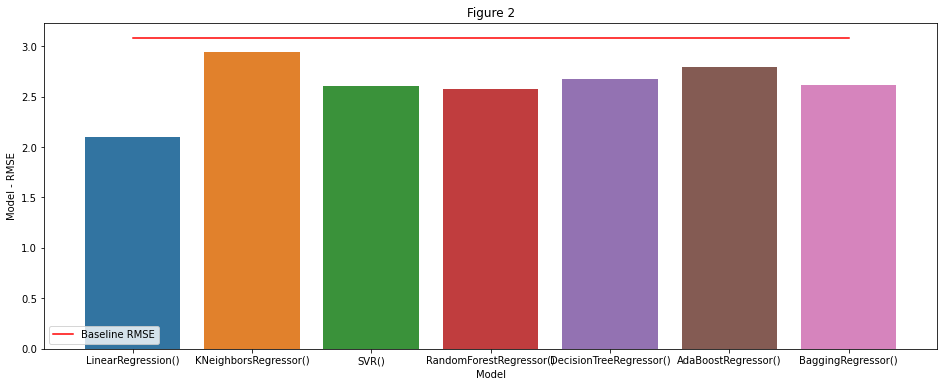

In [39]:
plt.figure(figsize=(16,6))
sns.barplot(data=dfb, x=dfb.index, y='Model - RMSE')
plt.plot(dfb['Baseline - RMSE'], color='red', label='Baseline RMSE')
plt.legend()
plt.title('Figure 2')
plt.savefig('../Images/batter_baseline');

In [40]:
# plot baseline 
dfb1 = pd.read_csv('../Projections/results_pitcher.csv')

In [41]:
dfb1.rename(columns={'Unnamed: 0':'Model'}, inplace=True)

In [42]:
dfb1.set_index(dfb1['Model'], inplace=True)

In [43]:
dfb1.drop(columns=['Model'], inplace=True)

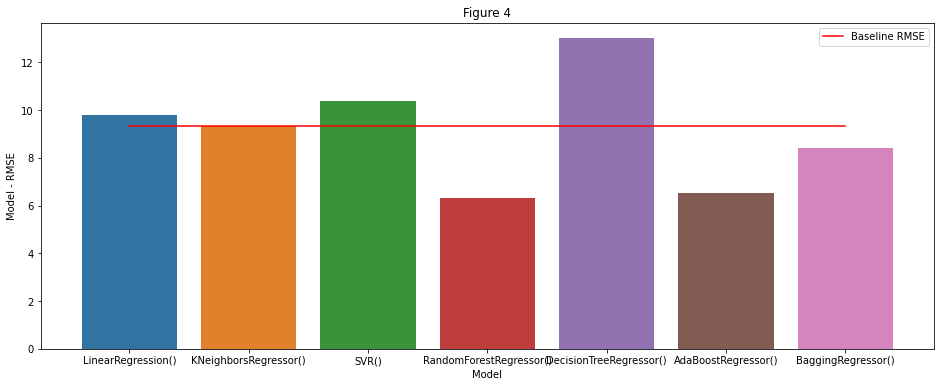

In [44]:
plt.figure(figsize=(16,6))
sns.barplot(data=dfb1, x=dfb1.index, y='Model - RMSE')
plt.plot(dfb1['Baseline - RMSE'], color='red', label='Baseline RMSE')
plt.legend()
plt.title('Figure 4')
plt.savefig('../Images/pitcher_baseline');

In [45]:
batter = pd.read_csv('../Modeling_Data/batter_data_modeling.csv')

In [46]:
batter['FPPG'].mean()

7.087898762039455

In [47]:
pitcher = pd.read_csv('../Modeling_Data/pitcher_data_modeling.csv')

In [48]:
pitcher['FPPG'].mean()

10.664786996731523

In [49]:
means = [batter['FPPG'].mean(), pitcher['FPPG'].mean()]

In [50]:
rmse_base = [dfb['Baseline - RMSE'][0], dfb1['Baseline - RMSE'][0]]

In [51]:
rmse_base

[3.0781594336221785, 9.344332308850891]

In [52]:
baseline = pd.DataFrame(data=[means, rmse_base], columns=['Batters', 'Pitchers'], index=['Avg_FPPG', 'Baseline_RMSE'])

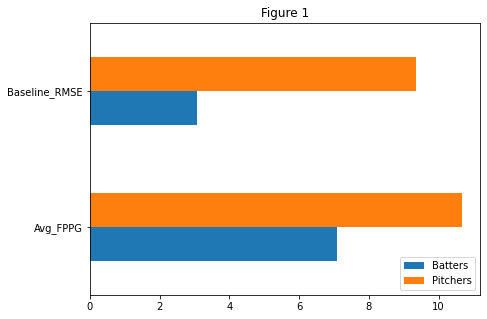

In [58]:
baseline.plot(figsize=(7,5), kind='barh')
plt.title('Figure 1')
plt.savefig('../Images/rmse_baseline.jpg');

In [21]:
baseline.reset_index(drop=True, inplace=True)

In [33]:
baseline

,Batters,Pitchers
0,7.087899,10.664787
1,3.078159,9.344332


In [61]:
from bokeh.io import output_file, show
from bokeh.models import ColumnDataSource
from bokeh.palettes import Spectral6
from bokeh.plotting import figure
from bokeh.transform import dodge

In [67]:
pos = ['Pitchers', 'Batters']
nums = ['FPPG Average', 'RMSE Baseline']

data = {'Position' : pos,
        'FPPG Average'   : [10.664787, 7.087899],
        'RMSE Baseline'   : [9.344332, 3.078159]}

source = ColumnDataSource(data=data)

p = figure(x_range=pos, y_range=(0, 15), plot_height=250, title="Figure 1: Baseline RMSE and FPPG Average")

p.vbar(x=dodge('Position', -0.25, range=p.x_range), top='FPPG Average', width=0.2, source=source,
       color="#ff9500", legend_label="FPPG Average")

p.vbar(x=dodge('Position',  0.0,  range=p.x_range), top='RMSE Baseline', width=0.2, source=source,
       color="#0040ff", legend_label="RMSE Baseline")

p.x_range.range_padding = 0.1
p.xgrid.grid_line_color = None
p.legend.location = "top_left"
p.legend.orientation = "horizontal"

show(p)